In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import minimize, Parameters, report_fit

In [47]:
'''Read data'''
g2_data = pd.read_csv(r'D:\Experiment\LDG33\20230426_LGD33_test.dat', skiprows=[i for i in range(9)])

counts = g2_data['#counts']



y = []
for items in counts:
    y.append(items)
x_data = range(len(y))
y_data = np.array(y)/np.mean(y)
n = len(x_data)
print(y.index(min(y)))

12561


In [48]:
'''Read data'''
g2_data = pd.read_csv(r'D:\Experiment\LDG33\20230426_LGD33_test.dat', skiprows=[i for i in range(9)])

counts = g2_data['#counts']



y = []
for items in counts:
    y.append(items)
x_data = np.array(range(len(y)))*0.008
y_data = np.array(y)/np.mean(y)
n = len(x_data)

In [49]:
def g(x,a):
    g = 1-(1-a[0])*np.exp(-1*np.abs(x-a[1])/a[2])
    return g

In [50]:
def residual(params, x, data):
    v = params.valuesdict()
    a = [v['a1'], v['a2'], v['a3']]
    model = g(x,a)
    return (data-model)

params = Parameters()
params.add('a1', value=0.07)
params.add('a2', value=y.index(min(y))*0.008)
params.add('a3', value=35*0.008)

out = minimize(residual, params, args=(x_data, y_data))
report_fit(out)
fitted_params = []
for name, param in out.params.items():
    fitted_params.append(param.value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 65536
    # variables        = 3
    chi-square         = 275.018448
    reduced chi-square = 0.00419664
    Akaike info crit   = -358706.391
    Bayesian info crit = -358679.120
[[Variables]]
    a1:  0.07774645 +/- 0.01535509 (19.75%) (init = 0.07)
    a2:  100.518260 +/- 0.00335369 (0.00%) (init = 100.488)
    a3:  0.28505062 +/- 0.00670659 (2.35%) (init = 0.28)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a3) = 0.707


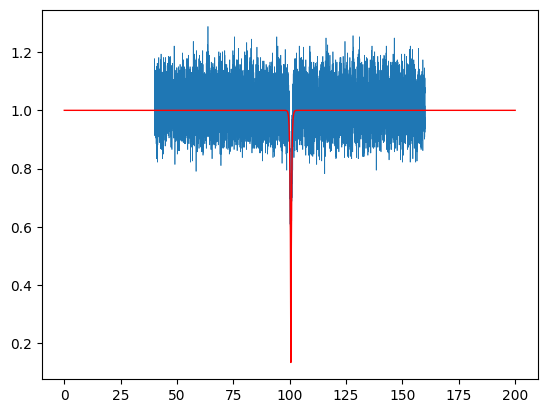

In [51]:
fig, ax = plt.subplots()
ax.plot(x_data[5000:20000],y_data[5000:20000], linewidth=0.5)
x = np.linspace(0,200,1000)
y = g(x,fitted_params)
ax.plot(x,y,'r',lw=1)
